<a href="https://colab.research.google.com/github/newfrogg/Automatic-Differentiation/blob/main/autodiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Mục lớn                             | Mục nhỏ                                                         |           |
|-------------------------------------|-----------------------------------------------------------------|-----------|
| Introduction                        |                                                                 |  1 người  |
|                                     | Differential Calculus                                           |  Tử Quân  |
|                                     | Rules of Calculus                                               |  Tử Quân  |
|                                     | Multivariate Chain Rule                                         |  Tử Quân  |
|                                     | Geometry of Gradients and Gradient Descent                      |  Tử Quân  |
| What Autodiff Isn’t                 |                                                                 |  3 người  |
|                                     | Autodiff is not finite differences (numerical differentiation)  |  An Đông  |
|                                     | Autodiff is not symbolic differentiation                        |  An Đông  |
|                                     | What autodiff is ?                                              |  An Đông  |
|                                     | Types of Autodiff (explain forward, backward)                   |  An Đông  |
|                                     | Backpropagation Algorithm                                       |  Gia Hinh |
|                                     | Gradient-Based Optimization                                     |  Gia Hinh |
|                                     | give an example and describe the autodiff step-by-step workflow |  Gia Hinh |
|                                     | Summary. Compare betwwen each type advancement of each types    |  Gia Hinh |
| Visualization. Code, Implementation |                                                                 |  1 người  |
|                                     | Code                                                            | Bảo Lương |
| Exercise                            |                                                                 |  2 người  |
|                                     | Q1-4                                                            |   Triết   |
|                                     | Q5-8                                                            | Minh Quân |

# Introduction

## Differential Calculus
Differential calculus is fundamentally the study of how functions behave under small changes. The key of single variable calculus is the behavior of familiar functions can be modeled by a line in a small enough range. This means that for most functions, it is reasonable to expect that as we shift the $x$ value of the function by a small amount $x + \epsilon$, the output $f(x)$ will also be shifted by a little bit.

We can consider the ratio of the change in the output of a function for a small change in the input of the function. We can write this formally as:
\\[\frac{L(x+\epsilon) - L(x)}{(x+\epsilon) - x} = \frac{L(x+\epsilon) - L(x)}{\epsilon}.\\]

The derivative of a function quantifies how the function's output changes in response to changes in its input and is defined by the limit:
\\[\frac{df}{dx}(x) = \lim_{\epsilon \rightarrow 0}\frac{f(x+\epsilon) - f(x)}{\epsilon}.\\]

## Rules of Calculus
### Common Derivatives
When computing derivatives one can oftentimes use a series of rules to reduce the computation to a few core functions.

*   Derivative of constants. $\frac{d}{dx}c = 0$
*   Derivative of linear functions. $\frac{d}{dx}(ax) = a$
*   Power rule. $\frac{d}{dx}x^n = nx^{n-1}$
*   Derivative of exponentials. $\frac{d}{dx}e^x = e^x$
*   Derivative of the logarithm. $\frac{d}{dx}\log(x) = \frac{1}{x}$

### Derivative Rules
We can generalize the above derivatives and compute more complex derivatives by codify what happens when we take functions and combine them in various ways, most importantly: sums, products, and compositions.
*   Sum rule $\frac{d}{dx}\left(g(x) + h(x)\right) = \frac{dg}{dx}(x) + \frac{dh}{dx}(x)$
*   Product rule $\frac{d}{dx}\left(g(x)\cdot h(x)\right) = g(x)\frac{dh}{dx}(x) + \frac{dg}{dx}(x)h(x)$
*   Chain rule $\frac{d}{dx}g(h(x)) = \frac{dg}{dh}(h(x))\cdot \frac{dh}{dx}(x)$

These rule provide us with a flexible set of tools to compute essentially any expression desired. As an example, let us find the derivative of the function $f(x) = \log\left(1+(x-1)^{10}\right)$:


\begin{split}\begin{aligned}
\frac{d}{dx}\left[\log\left(1+(x-1)^{10}\right)\right] & = \left(1+(x-1)^{10}\right)^{-1}\frac{d}{dx}\left[1+(x-1)^{10}\right]\\
& = \left(1+(x-1)^{10}\right)^{-1}\left(\frac{d}{dx}[1] + \frac{d}{dx}[(x-1)^{10}]\right) \\
& = \left(1+(x-1)^{10}\right)^{-1}\left(0 + 10(x-1)^9\frac{d}{dx}[x-1]\right) \\
& = 10\left(1+(x-1)^{10}\right)^{-1}(x-1)^9 \\
& = \frac{10(x-1)^9}{1+(x-1)^{10}}.
\end{aligned}\end{split}

Where each line has used the following rules:

1.   The chain rule and derivative of logarithm.
2.   The sum rule.
3.   The derivative of constants, chain rule, and power rule.
4.   The sum rule, derivative of linear functions, derivative of constants.

### Linear Approximation
When working with derivatives, it is often useful to geometrically interpret the approximation used above. In particular, note that the equation
 \\[f(x+\epsilon) \approx f(x) + \epsilon \frac{df}{dx}(x),\\]

approximates the value of $f$ by a line which passes through the point $(x, f(x))$ and has slope $\frac{df}{dx}(x)$. In this way we say that the derivative gives a linear approximation to the function $f$.

### Higher Order Derivatives
The derivative, $\frac{df}{dx}$, can be viewed as a function itself, so nothing stops us from computing the derivative of $\frac{df}{dx}$ to get $\frac{d^2f}{dx^2} = \frac{df}{dx}\left(\frac{df}{dx}\right)$. We will call this the second derivative of $f$. This function is the rate of change of the rate of change of $f$, or in other words, how the rate of change is changing. We may apply the derivative any number of times to obtain what is called the $n$-th derivative. To keep the notation clean, we will denote the $n$-th derivative as

\\[f^{(n)}(x) = \frac{d^{n}f}{dx^{n}} = \left(\frac{d}{dx}\right)^{n} f.\\]

The second derivative can be interpreted as describing the way that the function $f$ curves. A positive second derivative leads to a upwards curve, while a negative second derivative means that $f$ curves downwards, and a zero second derivative means that $f$ does not curve at all.
### Taylor Series
The Taylor series provides a method to approximate the function $f(x)$ if we are given values for the first $n$ derivatives at a point $x_0$, i.e., $\left\{ f(x_0), f^{(1)}(x_0), f^{(2)}(x_0), \ldots, f^{(n)}(x_0) \right\}$. The idea will be to find a degree $n$ polynomial that matches all the given derivatives at $x_0$.

We can get a degree $n$ polynomial by
\\[P_n(x) = \sum_{i = 0}^{n} \frac{f^{(i)}(x_0)}{i!}(x-x_0)^{i}.\\]
where the notation
\\[f^{(n)}(x) = \frac{d^{n}f}{dx^{n}} = \left(\frac{d}{dx}\right)^{n} f.\\]

Taylor series have two primary applications:

1. Theoretical applications: Often when we try to understand a too complex function, using Taylor series enables us to turn it into a polynomial that we can work with directly.

2. Numerical applications: Some functions like $e^{x}$ or $\cos(x)$ are difficult for machines to compute. They can store tables of values at a fixed precision (and this is often done), but it still leaves open questions like “What is the 1000-th digit of $\cos(1)$?” Taylor series are often helpful to answer such questions.

## Geometry of Gradients and Gradient Descent


In multivariable calculus, the gradient of a scalar-valued function $f: \mathbb{R}^n \rightarrow \mathbb{R} $ is a vector that points in the direction of the greatest rate of increase of the function. The gradient is denoted as $\nabla f $ and is defined as:

\\[\nabla f(\mathbf{x}) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n} \right)\\]

Here, each component $\frac{\partial f}{\partial x_i}$ represents the partial derivative of $f$ with respect to the variable $x_i$.

The geometric interpretation of gradients can be explained as follows:

* Direction: The gradient vector at a point $\mathbf{x}$ points in the direction of the steepest ascent of the function $f$ at that point.

* Magnitude: The length (or norm) of the gradient vector indicates the rate of increase of the function in that direction.

* Orthogonality to Level Sets: The gradient at a point is perpendicular (orthogonal) to the level set (or contour line) passing through that point. A level set is the set of points where the function $f$ has a constant value.

Gradient descent is an iterative optimization algorithm used to find local minima of differentiable functions. Starting from an initial point $\mathbf{x}_0$, the algorithm updates the point iteratively using the rule:

\\[\mathbf{x}_{k+1} = \mathbf{x}_k - \eta \nabla f(\mathbf{x}_k)\\]

Here:

* $\mathbf{x}_k $: Current point in $\mathbb{R}^n$.

* $\eta$: Learning rate or step size, a positive scalar determining the size of the step taken in the direction opposite to the gradient.

* $\nabla f(\mathbf{x}_k)$: Gradient of the function $ f$ at point $\mathbf{x}_k$.

At each iteration, the algorithm moves the current point $\mathbf{x}_k$ in the direction opposite to the gradient $\nabla f(\mathbf{x}_k)$, aiming to decrease the function's value.

Imagine a three-dimensional surface representing the function $f(\mathbf{x}) $, where the height corresponds to the function's value. The gradient at any point on this surface points in the direction of the steepest ascent. Therefore, moving in the opposite direction of the gradient leads to the steepest descent.

In two dimensions, the level sets of $ f $ are contour lines. The gradient vector at any point is perpendicular to the contour line at that point, pointing towards higher values of $f$. Gradient descent moves the point perpendicularly across contour lines towards regions of lower function values.

## Multivariate Chain Rule

The Multivariate Chain Rule is a fundamental concept in calculus, where functions often depend on multiple variables through complex compositions. When a function depends on multiple variables, and each of those variables is itself a function of other variables, the multivariate chain rule provides a systematic way to compute derivatives. This is essential for understanding how changes in input variables affect the output.

If a function $f$ depends on intermediate variables $u$ and $v$, which in turn depend on variables $a$ and $b$, the derivative of $f$ with respect to $a$ is given by:

\\[\frac{\partial f}{\partial a} = \frac{\partial f}{\partial u} \frac{\partial u}{\partial a} + \frac{\partial f}{\partial v} \frac{\partial v}{\partial a}\\]

This formula accounts for all the paths through which $a$ influences $f$.

For example, let us imagine network of functions where the functions on the right depend on those that are connected to on the left:

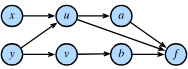

To compute something like $\frac{\partial f}{\partial y}$, we need to sum over all (in this case $3$) paths from $y$ to $f$ giving

\\[\frac{\partial f}{\partial y} = \frac{\partial f}{\partial a} \frac{\partial a}{\partial u} \frac{\partial u}{\partial y} + \frac{\partial f}{\partial u} \frac{\partial u}{\partial y} + \frac{\partial f}{\partial b} \frac{\partial b}{\partial v} \frac{\partial v}{\partial y}.\\]

https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/single-variable-calculus.html
https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/multivariable-calculus.html

# What Autodiff Isn’t

## Autodiff is not finite differences (numerical differentiation)

## Autodiff is not symbolic differentiation

## What autodiff is ? Types of Autodiff (explain forward, backward)
f(x1,x2) = [sin(x1/x2) + x1/x2 - e^x2] * [x1/x2 + e^x2]

## Types of Autodiff (explain forward, backward)







## Backpropagation Algorithm
## Gradient-Based Optimization
## give an example and describe the autodiff step-by-step workflow
## Summary. Compare betwwen each type advancement of each types

# Visualization

Code, implement AutoDiff, explain with an example. show backward and forward
Ex: f(x1, x2) = ln(x1) + x1x2 - sin(x2)

https://d2l.ai/chapter_preliminaries/autograd.html

https://homepages.inf.ed.ac.uk/htang2/mlg2022/tutorial-3.pdf


# Exercises (1-4)

1. Why is the second derivative much more expensive to compute than the first derivative?
1. After running the function for backpropagation, immediately run it again and see what happens. Investigate.
1. In the control flow example where we calculate the derivative of `d` with respect to `a`, what would happen if we changed the variable `a` to a random vector or a matrix? At this point, the result of the calculation `f(a)` is no longer a scalar. What happens to the result? How do we analyze this?
1. Let $f(x) = \sin(x)$. Plot the graph of $f$ and of its derivative $f'$. Do not exploit the fact that $f'(x) = \cos(x)$ but rather use automatic differentiation to get the result.



# Exercises (5-8)
1. Let $f(x) = ((\log x^2) \cdot \sin x) + x^{-1}$. Write out a dependency graph tracing results from $x$ to $f(x)$.
1. Use the chain rule to compute the derivative $\frac{df}{dx}$ of the aforementioned function, placing each term on the dependency graph that you constructed previously.
1. Given the graph and the intermediate derivative results, you have a number of options when computing the gradient. Evaluate the result once starting from $x$ to $f$ and once from $f$ tracing back to $x$. The path from $x$ to $f$ is commonly known as *forward differentiation*, whereas the path from $f$ to $x$ is known as backward differentiation.
1. When might you want to use forward, and when backward, differentiation? Hint: consider the amount of intermediate data needed, the ability to parallelize steps, and the size of matrices and vectors involved.

***Reference: origin notebook of d2l as below***

# Automatic Differentiation
:label:`sec_autograd`

Recall from :numref:`sec_calculus`
that calculating derivatives is the crucial step
in all the optimization algorithms
that we will use to train deep networks.
While the calculations are straightforward,
working them out by hand can be tedious and error-prone,
and these issues only grow
as our models become more complex.

Fortunately all modern deep learning frameworks
take this work off our plates
by offering *automatic differentiation*
(often shortened to *autograd*).
As we pass data through each successive function,
the framework builds a *computational graph*
that tracks how each value depends on others.
To calculate derivatives,
automatic differentiation
works backwards through this graph
applying the chain rule.
The computational algorithm for applying the chain rule
in this fashion is called *backpropagation*.

While autograd libraries have become
a hot concern over the past decade,
they have a long history.
In fact the earliest references to autograd
date back over half of a century :cite:`Wengert.1964`.
The core ideas behind modern backpropagation
date to a PhD thesis from 1980 :cite:`Speelpenning.1980`
and were further developed in the late 1980s :cite:`Griewank.1989`.
While backpropagation has become the default method
for computing gradients, it is not the only option.
For instance, the Julia programming language employs
forward propagation :cite:`Revels.Lubin.Papamarkou.2016`.
Before exploring methods,
let's first master the autograd package.


In [ ]:
import torch

## A Simple Function

Let's assume that we are interested
in (**differentiating the function
$y = 2\mathbf{x}^{\top}\mathbf{x}$
with respect to the column vector $\mathbf{x}$.**)
To start, we assign `x` an initial value.


In [ ]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

[**Before we calculate the gradient
of $y$ with respect to $\mathbf{x}$,
we need a place to store it.**]
In general, we avoid allocating new memory
every time we take a derivative
because deep learning requires
successively computing derivatives
with respect to the same parameters
a great many times,
and we might risk running out of memory.
Note that the gradient of a scalar-valued function
with respect to a vector $\mathbf{x}$
is vector-valued with
the same shape as $\mathbf{x}$.


In [ ]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

(**We now calculate our function of `x` and assign the result to `y`.**)


In [ ]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

[**We can now take the gradient of `y`
with respect to `x`**] by calling
its `backward` method.
Next, we can access the gradient
via `x`'s `grad` attribute.


In [ ]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

(**We already know that the gradient of the function $y = 2\mathbf{x}^{\top}\mathbf{x}$
with respect to $\mathbf{x}$ should be $4\mathbf{x}$.**)
We can now verify that the automatic gradient computation
and the expected result are identical.


In [ ]:
x.grad == 4 * x

tensor([True, True, True, True])

[**Now let's calculate
another function of `x`
and take its gradient.**]
Note that PyTorch does not automatically
reset the gradient buffer
when we record a new gradient.
Instead, the new gradient
is added to the already-stored gradient.
This behavior comes in handy
when we want to optimize the sum
of multiple objective functions.
To reset the gradient buffer,
we can call `x.grad.zero_()` as follows:


In [ ]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

## Backward for Non-Scalar Variables

When `y` is a vector,
the most natural representation
of the derivative of  `y`
with respect to a vector `x`
is a matrix called the *Jacobian*
that contains the partial derivatives
of each component of `y`
with respect to each component of `x`.
Likewise, for higher-order `y` and `x`,
the result of differentiation could be an even higher-order tensor.

While Jacobians do show up in some
advanced machine learning techniques,
more commonly we want to sum up
the gradients of each component of `y`
with respect to the full vector `x`,
yielding a vector of the same shape as `x`.
For example, we often have a vector
representing the value of our loss function
calculated separately for each example among
a *batch* of training examples.
Here, we just want to (**sum up the gradients
computed individually for each example**).


Because deep learning frameworks vary
in how they interpret gradients of
non-scalar tensors,
PyTorch takes some steps to avoid confusion.
Invoking `backward` on a non-scalar elicits an error
unless we tell PyTorch how to reduce the object to a scalar.
More formally, we need to provide some vector $\mathbf{v}$
such that `backward` will compute
$\mathbf{v}^\top \partial_{\mathbf{x}} \mathbf{y}$
rather than $\partial_{\mathbf{x}} \mathbf{y}$.
This next part may be confusing,
but for reasons that will become clear later,
this argument (representing $\mathbf{v}$) is named `gradient`.
For a more detailed description, see Yang Zhang's
[Medium post](https://zhang-yang.medium.com/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29).


In [ ]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

## Detaching Computation

Sometimes, we wish to [**move some calculations
outside of the recorded computational graph.**]
For example, say that we use the input
to create some auxiliary intermediate terms
for which we do not want to compute a gradient.
In this case, we need to *detach*
the respective computational graph
from the final result.
The following toy example makes this clearer:
suppose we have `z = x * y` and `y = x * x`
but we want to focus on the *direct* influence of `x` on `z`
rather than the influence conveyed via `y`.
In this case, we can create a new variable `u`
that takes the same value as `y`
but whose *provenance* (how it was created)
has been wiped out.
Thus `u` has no ancestors in the graph
and gradients do not flow through `u` to `x`.
For example, taking the gradient of `z = x * u`
will yield the result `u`,
(not `3 * x * x` as you might have
expected since `z = x * x * x`).


In [ ]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

Note that while this procedure
detaches `y`'s ancestors
from the graph leading to `z`,
the computational graph leading to `y`
persists and thus we can calculate
the gradient of `y` with respect to `x`.


In [ ]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

## Gradients and Python Control Flow

So far we reviewed cases where the path from input to output
was well defined via a function such as `z = x * x * x`.
Programming offers us a lot more freedom in how we compute results.
For instance, we can make them depend on auxiliary variables
or condition choices on intermediate results.
One benefit of using automatic differentiation
is that [**even if**] building the computational graph of
(**a function required passing through a maze of Python control flow**)
(e.g., conditionals, loops, and arbitrary function calls),
(**we can still calculate the gradient of the resulting variable.**)
To illustrate this, consider the following code snippet where
the number of iterations of the `while` loop
and the evaluation of the `if` statement
both depend on the value of the input `a`.


In [ ]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

Below, we call this function, passing in a random value, as input.
Since the input is a random variable,
we do not know what form
the computational graph will take.
However, whenever we execute `f(a)`
on a specific input, we realize
a specific computational graph
and can subsequently run `backward`.


In [ ]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

Even though our function `f` is, for demonstration purposes, a bit contrived,
its dependence on the input is quite simple:
it is a *linear* function of `a`
with piecewise defined scale.
As such, `f(a) / a` is a vector of constant entries
and, moreover, `f(a) / a` needs to match
the gradient of `f(a)` with respect to `a`.


In [ ]:
a.grad == d / a

tensor(True)

Dynamic control flow is very common in deep learning.
For instance, when processing text, the computational graph
depends on the length of the input.
In these cases, automatic differentiation
becomes vital for statistical modeling
since it is impossible to compute the gradient *a priori*.

## Discussion

You have now gotten a taste of the power of automatic differentiation.
The development of libraries for calculating derivatives
both automatically and efficiently
has been a massive productivity booster
for deep learning practitioners,
liberating them so they can focus on less menial.
Moreover, autograd lets us design massive models
for which pen and paper gradient computations
would be prohibitively time consuming.
Interestingly, while we use autograd to *optimize* models
(in a statistical sense)
the *optimization* of autograd libraries themselves
(in a computational sense)
is a rich subject
of vital interest to framework designers.
Here, tools from compilers and graph manipulation
are leveraged to compute results
in the most expedient and memory-efficient manner.

For now, try to remember these basics: (i) attach gradients to those variables with respect to which we desire derivatives; (ii) record the computation of the target value; (iii) execute the backpropagation function; and  (iv) access the resulting gradient.


## Exercises

1. Why is the second derivative much more expensive to compute than the first derivative?
1. After running the function for backpropagation, immediately run it again and see what happens. Investigate.
1. In the control flow example where we calculate the derivative of `d` with respect to `a`, what would happen if we changed the variable `a` to a random vector or a matrix? At this point, the result of the calculation `f(a)` is no longer a scalar. What happens to the result? How do we analyze this?
1. Let $f(x) = \sin(x)$. Plot the graph of $f$ and of its derivative $f'$. Do not exploit the fact that $f'(x) = \cos(x)$ but rather use automatic differentiation to get the result.
1. Let $f(x) = ((\log x^2) \cdot \sin x) + x^{-1}$. Write out a dependency graph tracing results from $x$ to $f(x)$.
1. Use the chain rule to compute the derivative $\frac{df}{dx}$ of the aforementioned function, placing each term on the dependency graph that you constructed previously.
1. Given the graph and the intermediate derivative results, you have a number of options when computing the gradient. Evaluate the result once starting from $x$ to $f$ and once from $f$ tracing back to $x$. The path from $x$ to $f$ is commonly known as *forward differentiation*, whereas the path from $f$ to $x$ is known as backward differentiation.
1. When might you want to use forward, and when backward, differentiation? Hint: consider the amount of intermediate data needed, the ability to parallelize steps, and the size of matrices and vectors involved.


[Discussions](https://discuss.d2l.ai/t/35)
